<a href="https://colab.research.google.com/github/EricGuimond/ycbs255/blob/master/EGuimond_AlexNeHomework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment
Build the AlexNet architecture and train it on the CIFAR100 dataset.

You may resize some of the kernel sizes (mainly the first one) and the number of kernels because CIFAR100 is a smaller dataset than ImageNet, as well as lower-resolution (32x32 vs 224x224).

You may resize the number of kernels used per layer if it speeds up training and/or preserves accuracy.

Report training, validation and test errors. Which hyperparameters did you change to improve performance?

**MAKE SURE YOU USE A GPU!** Top menu select "Runtime", then "Runtime Type". Make sure "Hardware Accelerator" has the option "GPU" selected.

Tips:
- Start with only a few of a layers and check if the network can learn.
- Add layers progressively.
- Be patient: more layers and dropout can make the learning slower.
- Check the shape of the output of the model to make sure your layers and convolutions are the right size.
- The accuracy for random predictions is ~0.01.
- Favor a model that works vs reproducing the exact architecture, in case the exact architecture is too difficult to train.
- If you don't reproduce the exact architecture, that is fine. Explain what you changed and why!
- If you implement a different architecture in favor of AlexNet, report performance by AlexNet nonetheless.

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import datasets
import matplotlib.pyplot as plt

TensorFlow 2.x selected.


In [2]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar100.load_data()

169009152/169001437 [==============================] - 13s 0us/step


In [3]:
X_train_full.shape, y_train_full.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

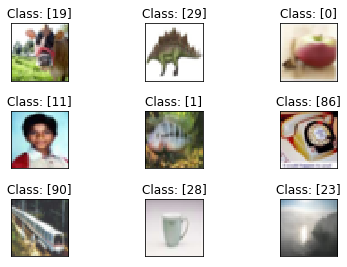

In [4]:
fig = plt.figure()

for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.tight_layout()
  plt.imshow(X_train_full[i], interpolation='none')
  plt.title('Class: {}'.format(y_train_full[i]))
  plt.xticks([])
  plt.yticks([])

In [0]:
class LocalResponseNormalization(keras.layers.Layer):
  """ Here is an implementation of the special layer used in the 2012 paper. """

  def __init__(self, depth_radius=5, bias=1, alpha=1, beta=0.5, **kwargs):
    super().__init__(**kwargs)
    self.depth_radius=depth_radius
    self.bias=bias
    self.alpha=alpha
    self.beta=beta

  def call(self, input):
    output = tf.nn.local_response_normalization(
        input,
        depth_radius=self.depth_radius,
        bias=self.bias,
        alpha=self.alpha,
        beta=self.beta,
        name=None)
    return output

In [0]:
model = keras.models.Sequential([
  keras.layers.Conv2D(filters = 16,
                      kernel_size = 3,
                      strides = 1,
                      padding='valid',
                      activation = 'relu',
                      input_shape = (32, 32, 3)),

  keras.layers.MaxPooling2D(pool_size = 3,
                                strides = 2),

  keras.layers.Conv2D(filters = 16,
                      kernel_size = 5,
                      strides = 1,
                      padding='valid',
                      activation = 'tanh'),

  keras.layers.AveragePooling2D(pool_size = 2,
                                strides = 2),
                                 
  keras.layers.Flatten(),
  keras.layers.Dense(units = 120,
                     activation = 'relu'),

  keras.layers.Dense(units = 84,
                     activation = 'relu'),
                     
  keras.layers.Dense(units = 10,
                     activation = 'softmax')
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

test

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        6416      
_________________________________________________________________
average_pooling2d (AveragePo (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [10]:
history = model.fit(X_train_full, y_train_full, epochs=5, validation_data=[X_test, y_test])

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 13s 255us/sample - loss: nan - accuracy: 0.0100 - val_loss: nan - val_accuracy: 0.0100
Epoch 2/5
50000/50000 [==============================] - 6s 112us/sample - loss: nan - accuracy: 0.0100 - val_loss: nan - val_accuracy: 0.0100
Epoch 3/5
50000/50000 [==============================] - 6s 114us/sample - loss: nan - accuracy: 0.0100 - val_loss: nan - val_accuracy: 0.0100
Epoch 4/5
50000/50000 [==============================] - 6s 111us/sample - loss: nan - accuracy: 0.0100 - val_loss: nan - val_accuracy: 0.0100
Epoch 5/5
50000/50000 [==============================] - 6s 110us/sample - loss: nan - accuracy: 0.0100 - val_loss: nan - val_accuracy: 0.0100


In [11]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

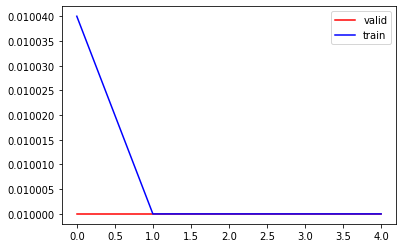

In [12]:
plt.plot(history.history['val_accuracy'], 'r')
plt.plot(history.history['accuracy'], 'b')
plt.legend(['valid', 'train'])


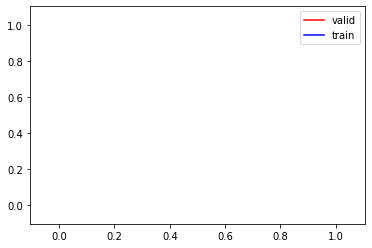

In [13]:
plt.plot(history.history['val_loss'], 'r')
plt.plot(history.history['loss'], 'b')
plt.legend(['valid', 'train'])